In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Survival Prediction 🛳️
 
A complete machine learning pipeline including EDA, feature engineering, modeling, and Kaggle submission.


# Importing Libraries and Dataset

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [170]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

📊**Data Overview & Missing Values**

We examine basic structure, numeric statistics and missing data patterns.


In [171]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [172]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
train_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

We explore the distribution of key variables and how they relate to survival.

**Univariate Analysis**

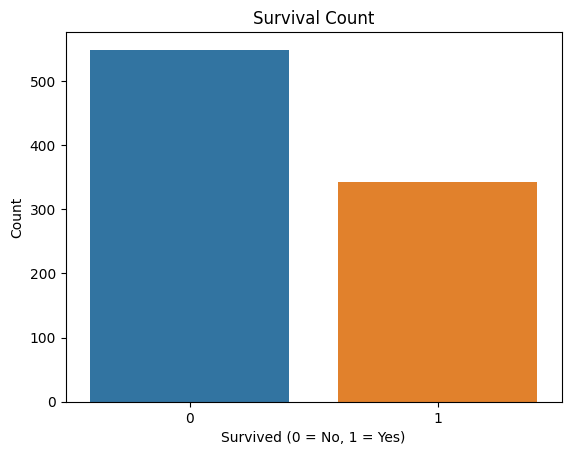

In [175]:
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [176]:
train_df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

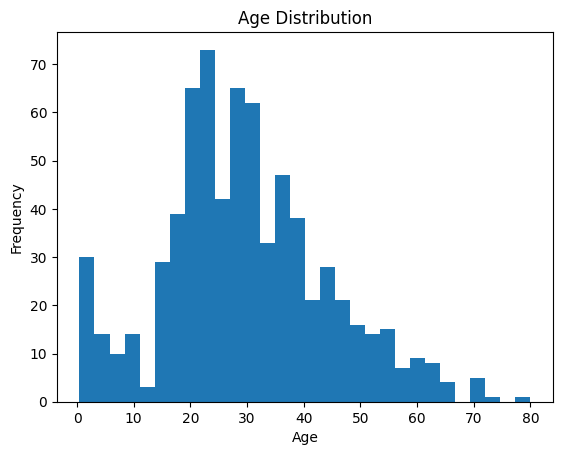

In [177]:
plt.hist(train_df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


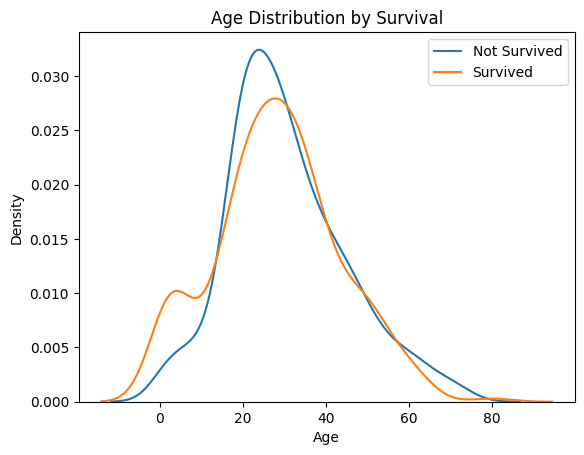

In [178]:
sns.kdeplot(train_df[train_df['Survived']==0]['Age'].dropna(), label='Not Survived')
sns.kdeplot(train_df[train_df['Survived']==1]['Age'].dropna(), label='Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

In [179]:
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [180]:
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

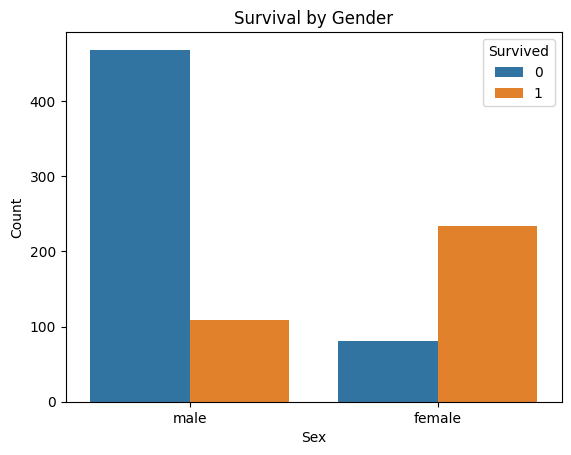

In [181]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.show()

In [182]:
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

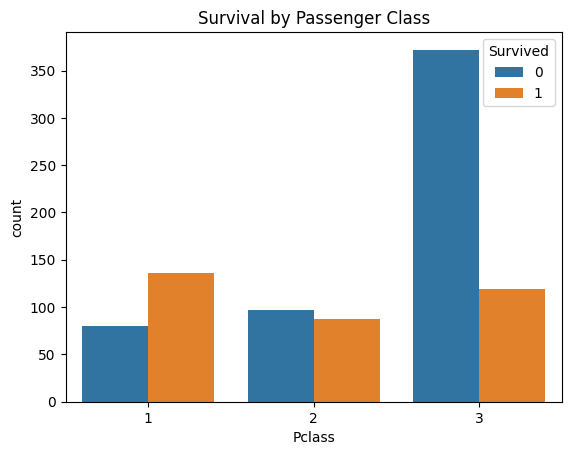

In [183]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

In [184]:
train_df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [185]:
train_df.groupby('Embarked')['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

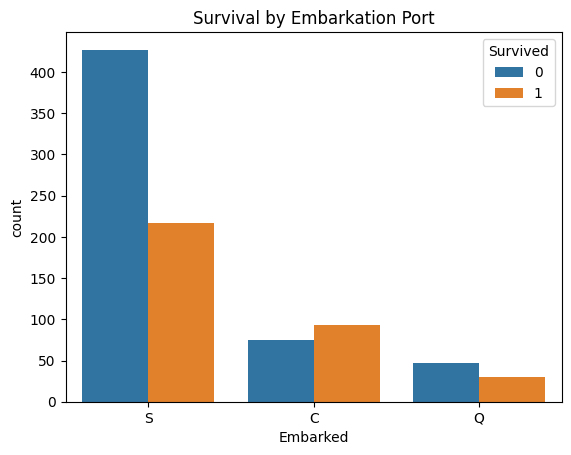

In [186]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.show()

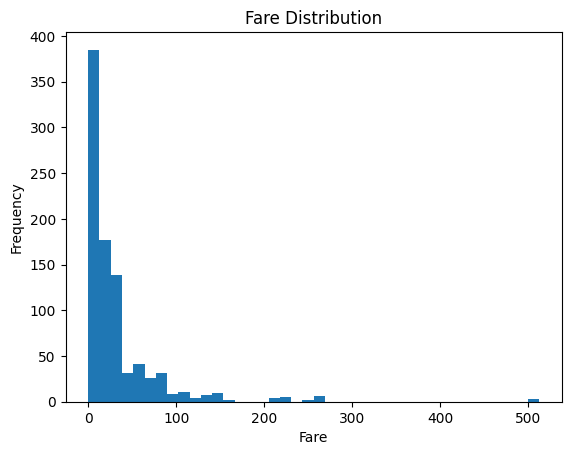

In [187]:
plt.hist(train_df['Fare'], bins=40)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

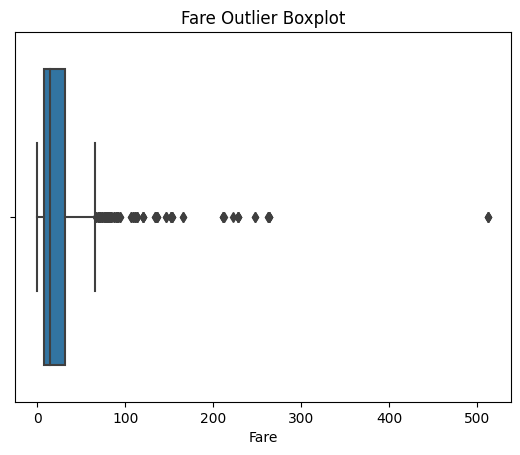

In [188]:
sns.boxplot(x=train_df['Fare'])
plt.title('Fare Outlier Boxplot')
plt.show()

In [189]:
train_df.groupby(['Pclass','Cabin'])['Survived'].mean()

Pclass  Cabin
1       A10      0.0
        A14      0.0
        A16      1.0
        A19      0.0
        A20      1.0
                ... 
3       F E69    1.0
        F G63    0.0
        F G73    0.0
        F38      0.0
        G6       0.5
Name: Survived, Length: 147, dtype: float64

**Bivariate Analysis**

In [190]:
pd.pivot_table(train_df, index='Survived',values=['Age','Fare','SibSp','Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [191]:
print(pd.pivot_table(train_df, index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print(pd.pivot_table(train_df, index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print(pd.pivot_table(train_df, index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


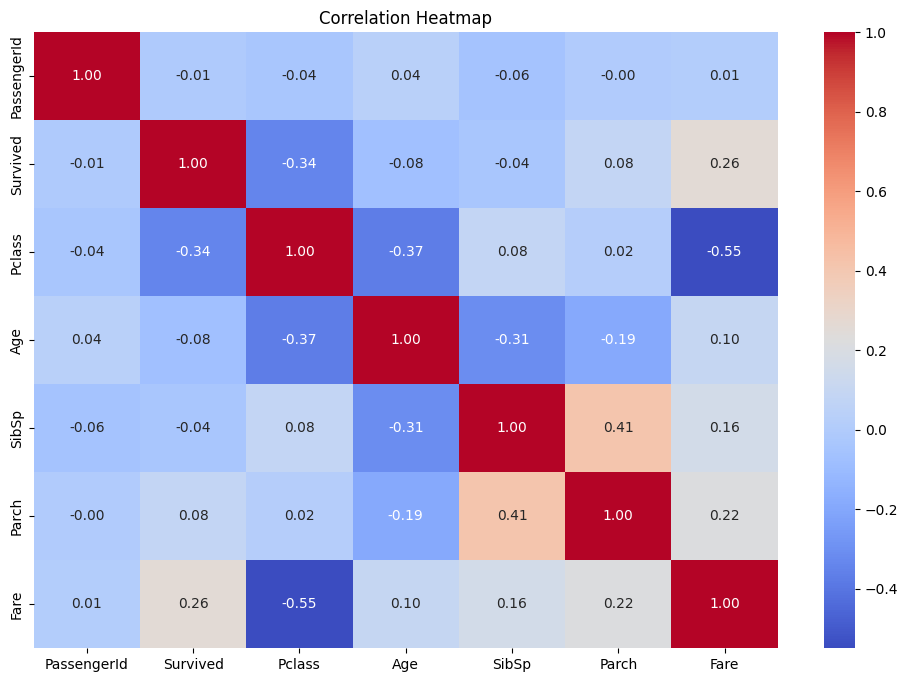

In [192]:
numeric_cols = train_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

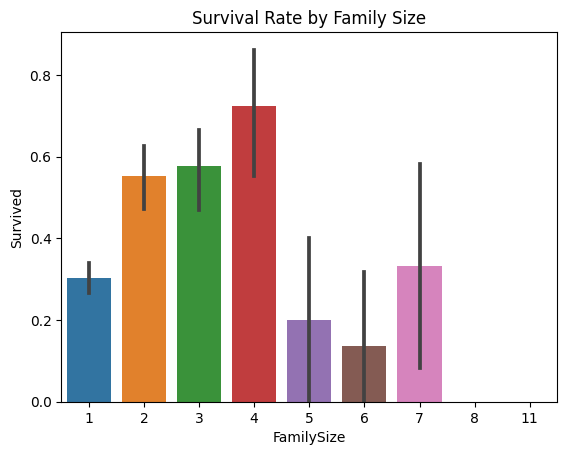

In [193]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by Family Size')
plt.show()

# Feature Engineering

We extract meaningful features such as:
- Title (from Name)
- FamilySize, IsAlone
- FarePerPerson
- TicketGroupSize/LargeGroup
- Cabin Deck(Cabin_F) / HasCabin
- Age Bands

In [194]:
for df in [train_df, test_df]:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
    df['Title'] = df['Title'].replace('Mme','Mrs')

In [195]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_38/1613448763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [196]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['FamilyCategory'] = pd.cut(df['FamilySize'], bins=[0,1,4,100], labels=['Alone','Small','Large'])

In [197]:
for df in [train_df, test_df]:
    df['Cabin'] = df['Cabin'].fillna('Unknown')
    df['Cabin_F'] = df['Cabin'].astype(str).str[0].replace('n','Unknown')
    df['HasCabin'] = (df['Cabin'] != 'Unknown').astype(int)


In [198]:
train_df['Age'] = train_df.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [199]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())


In [200]:
for df in [train_df, test_df]:
    
    df['AgeBand'] = pd.cut(
        df['Age'],
        bins=[0, 12, 18, 35, 60, np.inf],   # last bin open-ended
        labels=[0, 1, 2, 3, 4],
        right=False,
        include_lowest=True
    )

    df['AgeBand'] = df['AgeBand'].astype('int64')

In [201]:
for df in [train_df, test_df]:
    ticket_counts = df['Ticket'].value_counts()
    df['TicketGroupSize'] = df['Ticket'].map(ticket_counts).fillna(1).astype(int)
    df['LargeGroup'] = (df['TicketGroupSize'] >= 3).astype(int)

In [202]:
for df in [train_df, test_df]:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['FarePP'] = df['Fare'] / df['FamilySize']

In [203]:
train_df_f=train_df.drop(['PassengerId','Fare','Name','Ticket','Age','Survived','Cabin','SibSp','Parch'], axis=1)
test_df_f=test_df.drop(['PassengerId','Fare','Name','Ticket','Age','Cabin','SibSp','Parch'], axis=1)

In [204]:
x_train_cat=train_df_f[['Pclass', 'Sex','Title','Embarked','FamilyCategory','Cabin_F','IsAlone','HasCabin']]
x_train_num=train_df_f[['AgeBand','FamilySize','FarePP','LargeGroup']]
print(x_train_num.corr())

             AgeBand  FamilySize    FarePP  LargeGroup
AgeBand     1.000000   -0.349513  0.198762   -0.269265
FamilySize -0.349513    1.000000 -0.099173    0.589491
FarePP      0.198762   -0.099173  1.000000    0.241169
LargeGroup -0.269265    0.589491  0.241169    1.000000


In [205]:
x_train=train_df_f
y_train=train_df['Survived']

# **Preprocess**

In [206]:
x_train_categor=['Pclass', 'Sex','Title','Embarked','Cabin_F','IsAlone','HasCabin','FamilyCategory','LargeGroup']
x_train_numer=['AgeBand','FamilySize','FarePP','TicketGroupSize','LargeGroup']

In [207]:
preprocess= ColumnTransformer(
 transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'),x_train_categor),
        ('num',StandardScaler(),x_train_numer)
    ]
)

# **Model Training**

1. Logistic Regression

In [208]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000))
])

In [209]:
print(x_train.dtypes)
print(preprocess.transformers)


Pclass                int64
Sex                  object
Embarked             object
FamilySize            int64
Title                object
IsAlone               int64
FamilyCategory     category
Cabin_F              object
HasCabin              int64
AgeBand               int64
TicketGroupSize       int64
LargeGroup            int64
FarePP              float64
dtype: object
[('cat', OneHotEncoder(handle_unknown='ignore'), ['Pclass', 'Sex', 'Title', 'Embarked', 'Cabin_F', 'IsAlone', 'HasCabin', 'FamilyCategory', 'LargeGroup']), ('num', StandardScaler(), ['AgeBand', 'FamilySize', 'FarePP', 'TicketGroupSize', 'LargeGroup'])]


In [210]:
model.fit(x_train, y_train)
y_pred_log = model.predict(x_train) 

In [211]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cv,scoring='accuracy')
cm = confusion_matrix(y_train, y_pred_log)
print(cm)
print(classification_report(y_train, y_pred_log))
print("CV Accuracy:", scores.mean())

[[484  65]
 [ 77 265]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.77      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891

CV Accuracy: 0.8226790534178645


In [212]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=4,          # or 6–8
        min_samples_leaf=5,   # avoid tiny leaves
        min_samples_split=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])


In [213]:
rf_model.fit(x_train, y_train)
y_pred_rf=rf_model.predict(x_train)

In [214]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, x_train, y_train, cv=cv,scoring='accuracy')
cm = confusion_matrix(y_train, y_pred_rf)
print(cm)
print(classification_report(y_train, y_pred_rf))
print("CV Accuracy:", scores.mean())

[[490  59]
 [ 89 253]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.81      0.74      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891

CV Accuracy: 0.8260310087251271


In [215]:

xgb_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', XGBClassifier(
        n_estimators=800,
        max_depth=3,
        learning_rate=0.03,
        subsample=0.7,
        colsample_bytree=0.8,
        random_state=42,
        min_child_weight=1,
        reg_lambda=5,
        eval_metric='logloss'
    ))
])

In [216]:
print(x_train.columns)       # no 'Fare' here
print(preprocess.transformers)


Index(['Pclass', 'Sex', 'Embarked', 'FamilySize', 'Title', 'IsAlone',
       'FamilyCategory', 'Cabin_F', 'HasCabin', 'AgeBand', 'TicketGroupSize',
       'LargeGroup', 'FarePP'],
      dtype='object')
[('cat', OneHotEncoder(handle_unknown='ignore'), ['Pclass', 'Sex', 'Title', 'Embarked', 'Cabin_F', 'IsAlone', 'HasCabin', 'FamilyCategory', 'LargeGroup']), ('num', StandardScaler(), ['AgeBand', 'FamilySize', 'FarePP', 'TicketGroupSize', 'LargeGroup'])]


In [217]:
xgb_model.fit(x_train, y_train)
y_pred_xg=xgb_model.predict(x_train)

In [218]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, x_train, y_train, cv=cv,scoring='accuracy')
cm = confusion_matrix(y_train, y_pred_xg)
print(cm)
print(classification_report(y_train, y_pred_xg))
print("CV Accuracy:", scores.mean())

[[511  38]
 [ 66 276]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       549
           1       0.88      0.81      0.84       342

    accuracy                           0.88       891
   macro avg       0.88      0.87      0.87       891
weighted avg       0.88      0.88      0.88       891

CV Accuracy: 0.8350134957002071


| Model | CV Accuracy |
|-------|-------------|
| Logistic Regression | 0.827116104868914 |
| Random Forest | 0.8327340823970039 |
| XGBoost | 0.8315980024968788 |

## 🚀 Kaggle Submission
We generate predictions using the best model (XGBoost) and create submission.csv


In [219]:

print("train_df_f:", train_df_f.shape)   # (891, n_features)
print("test_df_f :", test_df_f.shape)    # (418, n_features)


X = train_df_f
y = train_df["Survived"]
X_test = test_df_f


rf_model.fit(X, y)

# 4. Predict on X_test only
test_pred = rf_model.predict(X_test)
print("len(test_pred):", len(test_pred))   # must be 418
print("len(test_df)  :", len(test_df))     # 418

# 5. Build submission
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"].values,
    "Survived": test_pred.astype(int)
})

submission.to_csv("submission.csv", index=False)


train_df_f: (891, 13)
test_df_f : (418, 13)
len(test_pred): 418
len(test_df)  : 418


In [220]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 🧾 Conclusion

- The strongest features were: Title, Sex, Pclass, FamilySize, FarePP.
- RandomForest performed the best with 0.83 CV accuracy and 0.78 public LB score.
- Further improvement possible using stacking, advanced hyperparameter tuning, or deep feature engineering.